#LAB9

In [ ]:
pip install tensorflow==1.0.0

In [ ]:
import tensorflow as tf
import numpy as np
x_data = np.array([[0,0], [0,1], [1,0], [1, 1]], dtype =np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_normal([2,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))

#Launch graph
with tf.Session() as sess:
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  
  for step in range(10001):
    sess.run(train, feed_dict = {X: x_data, Y: y_data})
    if step % 100 == 0:
      print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}), sess.run(W))

  # Accuracy report
  h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
  print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.88804406 [[-1.7848446]
 [-0.4903763]]
100 0.71792626 [[-0.86974233]
 [-0.15860981]]
200 0.7032435 [[-0.53386927]
 [-0.15222123]]
300 0.6973963 [[-0.33435664]
 [-0.13016076]]
400 0.6949793 [[-0.21158634]
 [-0.10244576]]
500 0.69395167 [[-0.13521342]
 [-0.07689847]]
600 0.6935049 [[-0.08718427]
 [-0.05602952]]
700 0.6933077 [[-0.05666093]
 [-0.04001721]]
800 0.69321954 [[-0.03707496]
 [-0.02818356]]
900 0.69317997 [[-0.02439919]
 [-0.01964928]]
1000 0.6931621 [[-0.01613451]
 [-0.01359704]]
1100 0.6931539 [[-0.01071168]
 [-0.00935614]]
1200 0.6931503 [[-0.00713462]
 [-0.00641048]]
1300 0.6931486 [[-0.00476465]
 [-0.0043778 ]]
1400 0.6931478 [[-0.00318876]
 [-0.00298208]]
1500 0.69314754 [[-0.00213774]
 [-0.00202736]]
1600 0.6931473 [[-0.00143515]
 [-0.00137617]]
1700 0.69314724 [[-0.00096454]
 [-0.00093303]]
1800 0.69314724 [[-0.00064882]
 [-0.00063199]]
1900 0.6931472 [[-0.00043675]
 [-0.00042776]]
2000 0.6931472 [[-0.00029418]
 [-0.00028937]]
2100 0.6931472 [[-0.00019823]
 [-0.00019

In [ ]:
import tensorflow as tf
import numpy as np
x_data = np.array([[0,0], [0,1], [1,0], [1, 1]], dtype =np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([2,2]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([2]), name = 'bias')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate= 0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))
# Launch graph
with tf.Session() as sess:
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  for step in range(10001):
    sess.run(train, feed_dict = {X: x_data, Y: y_data})
    if step % 100 == 0:
      print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}), sess.run([W1, W2]))

  # Accuracy report
  h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
  print("\nHypothesis: \n", h, "\nCorrect: \n", c, "\nAccuracy: ", a)

0 0.72893 [array([[ 0.76618475,  1.0385077 ],
       [ 0.3895815 , -0.02898468]], dtype=float32), array([[ 1.0061325 ],
       [-0.09647741]], dtype=float32)]
100 0.6915083 [array([[ 0.76264197,  1.045626  ],
       [ 0.41559148, -0.00442826]], dtype=float32), array([[ 0.77925605],
       [-0.18264927]], dtype=float32)]
200 0.6908945 [array([[0.79301053, 1.0486531 ],
       [0.47287157, 0.02075526]], dtype=float32), array([[ 0.7824952 ],
       [-0.19833244]], dtype=float32)]
300 0.69012344 [array([[0.8308891 , 1.0524509 ],
       [0.5366524 , 0.04828849]], dtype=float32), array([[ 0.7951461 ],
       [-0.21665601]], dtype=float32)]
400 0.6891224 [array([[0.8765933 , 1.0574352 ],
       [0.60715985, 0.07891029]], dtype=float32), array([[ 0.81357396],
       [-0.23982859]], dtype=float32)]
500 0.6878207 [array([[0.9308876 , 1.063983  ],
       [0.6850143 , 0.11342438]], dtype=float32), array([[ 0.83898276],
       [-0.2686706 ]], dtype=float32)]
600 0.6861297 [array([[0.9944651 , 1.0725

In [ ]:
import tensorflow as tf
import numpy as np
x_data = np.array([[0,0], [0,1], [1,0], [1, 1]], dtype =np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([2,10]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([10]), name = 'bias')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate= 0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))
# Launch graph
with tf.Session() as sess:
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  for step in range(10001):
    sess.run(train, feed_dict = {X: x_data, Y: y_data})
    if step % 100 == 0:
      print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}), sess.run([W1, W2]))

  # Accuracy report
  h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
  print("\nHypothesis: \n", h, "\nCorrect: \n", c, "\nAccuracy: ", a)

0 0.7489778 [array([[ 0.09904345, -0.841728  ,  0.8528214 , -1.1626395 ,  0.03209911,
        -0.0864863 , -0.22321245,  1.1675462 ,  0.7215739 , -1.2676736 ],
       [ 1.1661298 , -1.8115227 , -0.24581715, -0.60868925,  0.44845006,
         0.07720589,  0.96346277,  0.05479694, -0.7503952 , -0.08383991]],
      dtype=float32), array([[-0.39861345],
       [ 0.61177   ],
       [-0.613175  ],
       [ 0.3070926 ],
       [ 0.21167788],
       [ 0.45579046],
       [ 0.14955434],
       [ 0.49404788],
       [-0.44611368],
       [ 0.11573456]], dtype=float32)]
100 0.69796205 [array([[ 0.1372191 , -0.8196041 ,  0.8729409 , -1.1547937 ,  0.03049684,
        -0.084847  , -0.22306639,  1.1674407 ,  0.6845804 , -1.2678148 ],
       [ 1.1718755 , -1.806049  , -0.27164537, -0.59064955,  0.44596782,
         0.07052063,  0.9626324 ,  0.03869556, -0.7190548 , -0.08006193]],
      dtype=float32), array([[-0.46083364],
       [ 0.5539201 ],
       [-0.7223727 ],
       [ 0.22559099],
       [ 0.1

In [ ]:
import tensorflow as tf
import numpy as np
x_data = np.array([[0,0], [0,1], [1,0], [1, 1]], dtype =np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype = np.float32)

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([2,10]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([10]), name = 'bias')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([10, 10]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([10]), name = 'bias')

W3 = tf.Variable(tf.random_normal([10, 10]), name = 'weight3')
b3 = tf.Variable(tf.random_normal([10]), name = 'bias3')

W4 = tf.Variable(tf.random_normal([10, 1]), name = 'weight4')
b4 = tf.Variable(tf.random_normal([1]), name = 'bias4')

hypothesis = tf.sigmoid(tf.matmul(layer1, W4) + b4)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
train = tf.train.GradientDescentOptimizer(learning_rate= 0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))
# Launch graph
with tf.Session() as sess:
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())
  for step in range(10001):
    sess.run(train, feed_dict = {X: x_data, Y: y_data})
    if step % 100 == 0:
      print(step, sess.run(cost, feed_dict = {X: x_data, Y: y_data}), sess.run([W1, W2]))

  # Accuracy report
  h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
  print("\nHypothesis: \n", h, "\nCorrect: \n", c, "\nAccuracy: ", a)

0 0.7339908 [array([[ 0.03719466, -0.5733449 , -0.9547337 ,  0.0840546 ,  0.46603304,
        -0.73780876,  0.7672012 ,  0.5447171 , -0.8927301 , -0.33034492],
       [-0.33557835,  2.7831914 ,  1.8636216 ,  0.3254466 , -0.45917574,
        -1.7729167 ,  0.04494115, -0.5820288 ,  0.18702985, -0.4764674 ]],
      dtype=float32), array([[-0.99074864, -1.4963769 , -2.680643  ,  0.36666048, -0.14145885,
         0.3325559 ,  2.2203193 ,  1.1125023 ,  0.10207356, -0.31528223],
       [-0.02591733, -1.1249577 , -0.18789954,  0.9429034 , -1.352291  ,
        -0.54484147,  0.8534686 ,  0.35843006, -1.7118374 ,  1.292019  ],
       [-0.48141307,  1.2426809 , -0.12983611,  0.01112802,  0.37578467,
         0.13272242, -0.3617771 , -0.5563202 ,  0.01975096, -0.25530735],
       [ 1.6983528 , -0.6864836 ,  0.6889134 , -1.2229428 ,  0.7468979 ,
         0.95092094, -0.68203187, -0.09431144, -0.45506802,  0.5460833 ],
       [ 0.35075656, -0.25339738, -0.74638265, -0.37857142, -0.0695723 ,
         

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001, Cost: 2.221897156
Epoch: 0002, Cost: 1.707884468
Epoch: 0003, Cost: 1.362603699
Epoch: 0004, Cost: 1.110403842
Epoch: 0005, Cost: 0.955780042
Epoch: 0006, Cost: 0.853023510
Epoch: 0007, Cost: 0.777883286
Epoch: 0008, Cost: 0.720243511
Epoch: 0009, Cost: 0.673837936
Epoch: 0010, Cost: 0.636086642
Epoch: 0011, Cost: 0.604716067
Epoch: 0012, Cost: 0.578002639
Epoch: 0013, Cost: 0.555542191
Epoch: 0014, Cost: 0.536376869
Epoch: 0015, Cost: 0.519925487
Learning finished
Accuracy:  0.8568
Label:  [8]
Prediction:  [8]


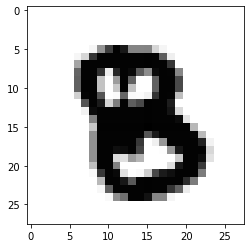

In [ ]:
# MNIST data NN (4 layers)
# Lab 7 Learning rate and Evaluation
import tensorflow as tf
import matplotlib.pyplot as plt
import random

tf.set_random_seed(777)  # for reproducibility

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

nb_classes = 10

# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.Variable(tf.random_normal([784, 10]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([10]), name = 'bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)
W2 = tf.Variable(tf.random_normal([10, 10]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([10]), name = 'bias2')
W3 = tf.Variable(tf.random_normal([10, 10]), name = 'weight3')
b3 = tf.Variable(tf.random_normal([10]), name = 'bias3')
W4 = tf.Variable(tf.random_normal([10, nb_classes]), name = 'weight4')
b4 = tf.Variable(tf.random_normal([nb_classes]), name = 'bias4')

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(layer1, W4) + b4)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
num_epochs = 15
batch_size = 100
num_iterations = int(mnist.train.num_examples / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(num_epochs):
        avg_cost = 0

        for i in range(num_iterations):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost_val = sess.run([train, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / num_iterations

        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))

    print("Learning finished")

    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: mnist.test.images, Y: mnist.test.labels}
        ),
    )

    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()



online tensorboard not checked

In [ ]:
# XOR tensorboard
import tensorflow as tf
import numpy as np
# MUST BE ADDED IN GOOGLE COLAB
tf.reset_default_graph()

tf.set_random_seed(777)

x_data = np.array([ [0, 0], [0, 1], [1, 0], [1, 1] ], dtype = np.float32)
y_data = np.array([ [0], [1], [1], [0] ], dtype = np.float32)

X = tf.placeholder(tf.float32, [None, 2], name = "x")
Y = tf.placeholder(tf.float32, [None, 1], name = "y")

with tf.name_scope("Layer1") :
  W1 = tf.Variable(tf.random_normal([2, 2]), name = "weight1")
  b1 = tf.Variable(tf.random_normal([2]), name = "bias1")
  layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

  tf.summary.histogram("W1", W1)
  tf.summary.histogram("b1", b1)
  tf.summary.histogram("Layer1", layer1)

with tf.name_scope("Layer2"):
  W2 = tf.Variable(tf.random_normal([2,1]), name = "weight2")
  b2 = tf.Variable(tf.random_normal([1]), name = "bias2")
  hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

  tf.summary.histogram("W2", W2)
  tf.summary.histogram("b2", b2)
  tf.summary.histogram("Hypothesis", hypothesis)

# cost/loss function
with tf.name_scope("Cost"):
  cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
  tf.summary.scalar("Cost", cost)

with tf.name_scope("Train"):
  train = tf.train.AdamOptimizer(learning_rate = 0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
tf.summary.scalar("accuracy", accuracy)

# Launch graph
with tf.Session() as sess:
  # Initialize TensorFlow variables
  sess.run(tf.global_variables_initializer())

  # tensorboard --logdir = ./logs/xor_logs
  merged_summary = tf.summary.merge_all()
  writer = tf.summary.FileWriter("./logs/xor_logs_r0_01")
  writer.add_graph(sess.graph) # Show the graph

  for step in range(10001):
    _, summary, cost_val = sess.run([train, merged_summary, cost], feed_dict = {X: x_data, Y: y_data})
    writer.add_summary(summary, global_step = step)

    if step % 100 == 0:
      print(step, cost_val)

  # Accuracy report
  h, p, a = sess.run([hypothesis, predicted, accuracy], feed_dict = {X: x_data, Y: y_data})
  print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

0 0.7168676
100 0.6908567
200 0.4987004
300 0.22536191
400 0.12291674
500 0.07914587
600 0.056153916
700 0.042352118
800 0.033301707
900 0.026986767
1000 0.022373725
1100 0.018883029
1200 0.016166918
1300 0.014005077
1400 0.01225182
1500 0.010807423
1600 0.009601375
1700 0.008582563
1800 0.0077132173
1900 0.006964792
2000 0.0063154213
2100 0.0057480196
2200 0.0052491743
2300 0.0048080757
2400 0.004416026
2500 0.0040659807
2600 0.003752165
2700 0.0034696562
2800 0.003214465
2900 0.0029832232
3000 0.0027729846
3100 0.0025813607
3200 0.0024062647
3300 0.0022458504
3400 0.0020985585
3500 0.0019630531
3600 0.0018381808
3700 0.0017228327
3800 0.0016161548
3900 0.0015173084
4000 0.0014256048
4100 0.0013404004
4200 0.0012611565
4300 0.0011873196
4400 0.0011184708
4500 0.0010541913
4600 0.0009941373
4700 0.0009379649
4800 0.00088534516
4900 0.0008360541
5000 0.00078983756
5100 0.0007464565
5200 0.00070570176
5300 0.00066743896
5400 0.0006314291
5500 0.00059755263
5600 0.0005656603
5700 0.000535